In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from pprint import pprint
import sys
from colorama import Style, Fore
import warnings
import time 
import datetime as dt 


warnings.filterwarnings(action = 'ignore')

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [115]:
data = pd.read_csv("C:/Users/whileduck/Desktop/Github/BigContest2023/data/2023ÎπÖÏΩòÌÖåÏä§Ìä∏_Ïñ¥ÎìúÎ∞¥Ïä§ÎìúÎ¶¨Í∑∏_ÏòàÏà†ÏùòÏ†ÑÎãπ.csv")

##### **ÏΩòÏÑúÌä∏ÌôÄÏù¥Î©¥ÏÑú Í≤ΩÏö∞Î°úÎßå Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ÌïòÍ∏∞** 

In [3]:
cond = data['place'] == 'ÏΩòÏÑúÌä∏ÌôÄ'

data = data[cond]

In [4]:
data.head()

age gender membership_type_1 membership_type_2 membership_type_3  \
0  50.0      F                Í≥®Îìú                Î¨¥Î£å                Í∑∏Î¶∞   
4  50.0      M                Î¨¥Î£å               NaN               NaN   
5  30.0      F                Î∏îÎ£®                Î¨¥Î£å               NaN   
6   NaN    NaN               NaN               NaN               NaN   
7   NaN    NaN               NaN               NaN               NaN   

  membership_type_4 membership_type_5  membership_type_6  tran_date  \
0               NaN               NaN                NaN   20220114   
4               NaN               NaN                NaN   20220206   
5               NaN               NaN                NaN   20181124   
6               NaN               NaN                NaN   20191020   
7               NaN               NaN                NaN   20190613   

   tran_time  ...  ticket_cancel  discount_type performance_code  \
0       1512  ...              2             ÏùºÎ∞ò              302   
4       1615  ...              0             ÏùºÎ∞ò              897   
5       1145  ...              2     Î∏îÎ£®ÌöåÏõê Ìï†Ïù∏20%              528   
6       1459  ...              0            Ï¥àÎåÄÍ∂å               44   
7        954  ...              0            Ï¥àÎåÄÍ∂å              827   

   pre_open_date   open_date genre  place  running_time  intermission  \
0     20220114.0  20220115.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           120            15   
4     20220109.0  20220110.0    ÎèÖÏ£º   ÏΩòÏÑúÌä∏ÌôÄ            90             0   
5     20181119.0  20181119.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           100            15   
6            NaN  20191023.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           100            15   
7     20190602.0  20190602.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           120            20   

  member_yn  
0         Y  
4         Y  
5         Y  
6         N  
7         N  

[5 rows x 24 columns]

# **ÎπÖ ÏΩòÌÖåÏä§Ìä∏ ÏùòÎ¨∏ ÏÇ¨Ìï≠**

### **1. price Í∞Ä 0Ïù∏ Í≤ΩÏö∞Îäî Î¨¥ÏóáÏùºÍπå ? Ï¥àÎåÄÍ∂åÏù¥ ÏïÑÎãòÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† price Í∞Ä 0Ïù∏ Í≤ΩÏö∞ÎèÑ ÏûàÏùå**

In [5]:
df = data.copy()

price_cond = df['price'] == 0
price_0_df = df[price_cond]
total_discount_type = price_0_df['discount_type'].unique()
error_discount = ['Í∏∞ÌöçÏÇ¨ Ìï†Ïù∏50%', 'Í∏∞ÌöçÏÇ¨ ÌåêÎß§20%','Í∏∞ÌöçÏÇ¨ 20%', 'Í∏∞ÌöçÏÇ¨Ìï†Ïù∏40%','Í∏∞ÌöçÏÇ¨ ÌåêÎß§30%','Ïó∞Ï£ºÏûêÌï†Ïù∏30%','Í∏∞ÌöçÏÇ¨ÌåêÎß§20%','Í∏∞ÌöçÏÇ¨(ÌäπÎ≥ÑÌï†Ïù∏)']
error_discount_cond = df['discount_type'].str.contains('|'.join(error_discount))

Í∞ÄÍ≤©Ïù¥0Ïù¥Î©¥ÏÑú_Ï¥àÎåÄÍ∂åÏù¥_ÏïÑÎãåÍ≤ΩÏö∞ = df[(price_cond) & (error_discount_cond)]

Í∞ÄÍ≤©Ïù¥0Ïù¥Î©¥ÏÑú_Ï¥àÎåÄÍ∂åÏù¥_ÏïÑÎãåÍ≤ΩÏö∞.to_csv('Í∞ÄÍ≤©Ïù¥0Ïù¥Î©¥ÏÑú_Ï¥àÎåÄÍ∂åÏù¥_ÏïÑÎãåÍ≤ΩÏö∞.csv',index = False)

In [6]:
length  = len(Í∞ÄÍ≤©Ïù¥0Ïù¥Î©¥ÏÑú_Ï¥àÎåÄÍ∂åÏù¥_ÏïÑÎãåÍ≤ΩÏö∞)

print('Í∞ÄÍ≤©Ïù¥ 0Ïù¥Î©¥ÏÑú Ï¥àÎåÄÍ∂åÏù¥ ÏïÑÎãå Í≤ΩÏö∞Ïùò Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ',length)

Í∞ÄÍ≤©Ïù¥0Ïù¥Î©¥ÏÑú_Ï¥àÎåÄÍ∂åÏù¥_ÏïÑÎãåÍ≤ΩÏö∞.head()

Í∞ÄÍ≤©Ïù¥ 0Ïù¥Î©¥ÏÑú Ï¥àÎåÄÍ∂åÏù¥ ÏïÑÎãå Í≤ΩÏö∞Ïùò Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  83


age gender membership_type_1 membership_type_2 membership_type_3  \
20705  NaN    NaN               NaN               NaN               NaN   
28797  NaN    NaN               NaN               NaN               NaN   
40211  NaN    NaN               NaN               NaN               NaN   
47478  NaN    NaN               NaN               NaN               NaN   
54771  NaN    NaN               NaN               NaN               NaN   

      membership_type_4 membership_type_5  membership_type_6  tran_date  \
20705               NaN               NaN                NaN   20201025   
28797               NaN               NaN                NaN   20190216   
40211               NaN               NaN                NaN   20201025   
47478               NaN               NaN                NaN   20201025   
54771               NaN               NaN                NaN   20190216   

       tran_time  ...  ticket_cancel  discount_type performance_code  \
20705       1648  ...              2      Í∏∞ÌöçÏÇ¨ ÌåêÎß§20%             1269   
28797       1738  ...              0       Í∏∞ÌöçÏÇ¨Ìï†Ïù∏40%             2556   
40211       1652  ...              0      Í∏∞ÌöçÏÇ¨ ÌåêÎß§30%             1269   
47478       1652  ...              0      Í∏∞ÌöçÏÇ¨ ÌåêÎß§30%             1269   
54771       1738  ...              0       Í∏∞ÌöçÏÇ¨Ìï†Ïù∏40%             2556   

       pre_open_date   open_date genre  place  running_time  intermission  \
20705     20200815.0  20200816.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           110            15   
28797            NaN  20190114.0    ÏÑ±ÏïÖ   ÏΩòÏÑúÌä∏ÌôÄ           120            15   
40211     20200815.0  20200816.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           110            15   
47478     20200815.0  20200816.0   ÍµêÌñ•Í≥°   ÏΩòÏÑúÌä∏ÌôÄ           110            15   
54771            NaN  20190114.0    ÏÑ±ÏïÖ   ÏΩòÏÑúÌä∏ÌôÄ           120            15   

      member_yn  
20705         N  
28797         N  
40211         N  
47478         N  
54771         N  

[5 rows x 24 columns]

In [7]:
class DataExploratioin:
    '''
    Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ Ïãú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Class 

    Í∏∞Ï°¥ Ï°¥Ïû¨ÌïòÎäî ÌîÑÎ†àÏûÑÏõåÌÅ¨Îì§ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏûêÏ£º Ïù¥Ïö©ÌïòÎäî ÌîÑÎ†àÏûÑÏõåÌÅ¨Îì§ÏùÑ ÌôúÏö©ÌïòÏó¨ ÎÇòÎßåÏùò Î∂ÑÏÑù Ìà¥ÏùÑ ÎßåÎì§Î†§Í≥† Ìï® 

    Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ, Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Îì±Ïùò ÎÇ¥Ïö©Ïù¥ Îã¥Í≤®ÏûàÎäî class 
    '''

    def __init__(self, data):
        self.data = data

    def summarize(self):
        '''
        Îç∞Ïù¥ÌÑ∞Î•º Ï¥àÏ∞ΩÍ∏∞Ïóê ÏöîÏïΩÌï¥Ï£ºÎäî method
        '''

        cols = self.data.columns

        size = round(sys.getsizeof(self.data) / 1024 ** 2, 2)

        print(f'data size : {size}MB')

        self.result = pd.DataFrame()

        self.result['Dtype'] = self.data.dtypes.values
        self.result['Count'] = self.data.count().values
        self.result['Nunique'] = self.data.nunique().values
        self.result['Missing value'] = self.data.isna().sum().values
        self.result['Missing %'] = [str(round(
            missing / len(self.data), 2) * 100) + '%' for missing in self.result['Missing value']]
        self.result['Most Freq Value'] = self.data.mode().iloc[0].values

        freq_prop = []

        for i, col in enumerate(cols):

            raw_data = self.data.loc[~self.data[col].isna(), col]
            freq_value = self.result['Most Freq Value'].iloc[i]

            prop = np.mean(
                np.array(raw_data == freq_value)
            )

            prop_str = str(round(np.mean(prop) * 100, 1)) + '%'

            if prop_str == 'nan%':
                freq_prop.append(self.result['Missing %'].iloc[i])
            else:
                freq_prop.append(prop_str)

        self.result['Most Freq Value %'] = freq_prop

        self.result['Min'] = self.data.describe(include='all').T['min'].values
        self.result['Max'] = self.data.describe(include='all').T['max'].values
        self.result['Mean'] = self.data.describe(
            include='all').T['mean'].values
        self.result['Median'] = self.data.describe(
            include='all').T['50%'].values
        
        memory = (self.data.memory_usage(deep = True) // 1024 **2).values[1:] # index Ïùò usage Îäî Ï†úÏô∏ÌïòÍ≥† Î≥¥Ïûê 

        
        self.result['MB'] = [str(m) + ' mb' for m in memory]
        self.result = self.result.set_index(cols)

        self.result = self.result.fillna('-')

        display(self.result)
    
    
    def progress_bar(self,iterable, total_blocks = 10):
        
        total_items = len(iterable)
        block_size = total_items // total_blocks
        
        for i, item in enumerate(iterable, start=1):
            if i % block_size == 0 or i == total_items:
                progress = (i / total_items) * 100
                blocks = int(progress / (100 / total_blocks))
                empty_blocks = total_blocks - blocks
                progress_bar = '‚ñ†' * blocks + '‚ñ¢' * empty_blocks
                print(f"\rProgress: [{progress_bar}] {progress:.2f}%", end='', flush=True)
            yield item
            time.sleep(0.0000001)
    
    def reduce_size(self):
                
        original_size = round(sys.getsizeof(self.data) / 1024 ** 2,2)
        
        df = self.data.copy()
        
        for col in self.progress_bar(df.columns):
            
            dtp = df[col].dtype
            
            if dtp == 'object':
                df[col] = df[col].astype('category')
            else: # numeric typeÏù¥Î©¥ 
                
                if min(df[col]) >= 0 : # Î∂ÄÌò∏Í∞Ä ÏóÜÎã§Î©¥ unit ÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï§òÎèÑ ÎêúÎã§.
                    max_value = max(df[col])
                    
                    bits = [8,16,32,64]
                    
                    for bit in bits: # ÏµúÏÜåÌïúÏùò ÎπÑÌä∏Î°ú ÌëúÌòÑ Îê† Ïàò ÏûàÍ≤å dtype Î≥ÄÍ≤Ω 
                        if max_value < 2 ** bit:
                            # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ astype ÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÏßÄ Î™ªÌïòÎãà Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏõåÏ§Ä ÌõÑ Î≥ÄÍ≤ΩÌïòÍ≥† Îã§Ïãú Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Ïûê 
                            df[col] = df[col].fillna(2 ** bit - 1)
                            df[col] = df[col].astype(f'uint{bit}')
                            df[col] = df[col].replace(2 ** bit - 1, np.NaN)
                            break
                        
                else: # Î∂ÄÌò∏Í∞Ä ÏûàÎã§Î©¥ int type ÏúºÎ°ú Î∞îÍøîÏ£ºÏûê 
                    
                    max_value = max(abs(min(df[col])), max(df[col]))
                    
                    bits = [8,16,32,64]
                    
                    for bit in bits:
                        if max_value < 2 ** bit:
                            df[col] = df[col].fillna(2 ** bit - 1)
                            df[col] = df[col].astype(f'int{bit}')
                            df[col] = df[col].replace(2 ** bit - 1, np.NaN)
                            break
                        
        print('\n')
                        
        after_size = round(sys.getsizeof(df) / 1024 ** 2,2)
        
        # Î∞îÍæº ÌõÑ Í≤∞Í≥º Î≥¥Ïó¨Ï£ºÍ∏∞ 
        after = DataExploratioin(df)
        after.summarize()
        
        print(f'\n {original_size}MB -> {after_size}MB')
            
        return df
                        
            
                

In [8]:
ep = DataExploratioin(data)

In [9]:
ep.summarize()

data size : 841.91MB


Dtype    Count  Nunique  Missing value  \
age                float64   484517        8         612451   
gender              object   484867        2         612101   
membership_type_1   object   484867        3         612101   
membership_type_2   object   389737        5         707231   
membership_type_3   object   140468        4         956500   
membership_type_4   object    25160        3        1071808   
membership_type_5   object     1110        1        1095858   
membership_type_6  float64        0        0        1096968   
tran_date            int64  1096968     1687              0   
tran_time            int64  1096968     1440              0   
play_date            int64  1096968      737              0   
play_st_time         int64  1096968       10              0   
seat                object  1096968     2509              0   
price                int64  1096968      206              0   
ticket_cancel        int64  1096968        2              0   
discount_type       object  1096968      710              0   
performance_code     int64  1096968      703              0   
pre_open_date      float64   701323      300         395645   
open_date          float64  1096968      455              0   
genre               object  1071895       13          25073   
place               object  1096968        1              0   
running_time         int64  1096968       28              0   
intermission         int64  1096968        5              0   
member_yn           object  1096968        2              0   

                            Missing % Most Freq Value Most Freq Value %  \
age                56.00000000000001%            50.0             23.8%   
gender             56.00000000000001%               F             65.1%   
membership_type_1  56.00000000000001%              Î¨¥Î£å             47.5%   
membership_type_2               64.0%              Î¨¥Î£å             49.7%   
membership_type_3               87.0%              Í∑∏Î¶∞             43.6%   
membership_type_4               98.0%              Í∑∏Î¶∞             77.7%   
membership_type_5              100.0%              Í∑∏Î¶∞            100.0%   
membership_type_6              100.0%               -            100.0%   
tran_date                        0.0%        20221112              0.7%   
tran_time                        0.0%            1401              0.7%   
play_date                        0.0%        20221120              0.5%   
play_st_time                     0.0%            1930             38.5%   
seat                             0.0%     1Ï∏µ CÎ∏îÎ°ù13Ïó¥ 1              0.1%   
price                            0.0%               0             52.8%   
ticket_cancel                    0.0%               0             78.8%   
discount_type                    0.0%             Ï¥àÎåÄÍ∂å             35.4%   
performance_code                 0.0%            1496              0.7%   
pre_open_date                   36.0%      20230505.0              6.1%   
open_date                        0.0%      20230507.0              4.1%   
genre                            2.0%             ÍµêÌñ•Í≥°             48.7%   
place                            0.0%            ÏΩòÏÑúÌä∏ÌôÄ            100.0%   
running_time                     0.0%             120             46.3%   
intermission                     0.0%              15             63.3%   
member_yn                        0.0%               N             55.8%   

                          Min         Max             Mean      Median      MB  
age                      10.0        80.0        43.018718        40.0    8 mb  
gender                      -           -                -           -   45 mb  
membership_type_1           -           -                -           -   58 mb  
membership_type_2           -           -                -           -   53 mb  
membership_type_3           -           -                -           -   40 mb  
membership_type_4           -      


# **üí°insight** 

Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶à : 841.91 MB


0. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Îç∞Ïù¥ÌÑ∞ Ï§ë ÎπàÏ¢åÏÑùÏùÄ 56% Ïóê Ïú°Î∞ïÌï©ÎãàÎã§. ÏΩîÎ°úÎÇòÎ°ú Ïù∏Ìïú ÎåÄÎ©¥ Í±∞Î¶¨ÎëêÍ∏∞ Îì±Ïóê Îî∞Îùº ÏÉÅÏù¥ÌïòÍ≤†ÏßÄÎßå age ÏôÄ gender Ïùò Í≤ΩÏö∞Í∞Ä missing value Ïù∏ Í≤ΩÏö∞Í∞Ä ÎπàÏ¢åÏÑùÏûÖÎãàÎã§.

1. Ïó∞Î†πÎåÄÎäî bining Îêú ÌòïÌÉúÎ°ú Ï°¥Ïû¨Ìï©ÎãàÎã§ 10ÎåÄ~80ÎåÄ ÍπåÏßÄ ÏûàÏäµÎãàÎã§. ÌòÑÏû¨ ÌÖåÏù¥Î∏îÏóêÏÑú 50ÎåÄ Ïó∞Î†πÏù¥ 56% Í∞ÄÎüâ ÏûàÏäµÎãàÎã§.

2. ÏÑ±Î≥ÑÏùÄ Ïó¨ÏÑ±Ïùò ÎπÑÏú®Ïù¥ 65%, ÎÇ®ÏÑ±Ïùò ÎπÑÏú®Ïù¥ 35%ÏûÖÎãàÎã§

3. Í∞Å Î©§Î≤ÑÏã≠ ÌÉÄÏûÖ Î≥Ñ Î©§Î≤ÑÏã≠ Í∞ÄÏßÄÏàòÏùò ÏµúÎåÄÏπòÎäî ÏµúÎåÄ 5Í∞úÏù∏ Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. Î©§Î≤ÑÏã≠ ÌÉÄÏûÖ 5, 6 ÍπåÏßÄ Í∞ÄÏßÄÍ≥† Í≤∞Ï†úÌïú Í≥†Í∞ùÏùÄ ÎßéÏù¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§.

4. Ïú†ÎãàÌÅ¨Ìïú Ï¢åÏÑùÏùò Í∞úÏàòÎäî 2509Í∞úÏûÖÎãàÎã§.

5. Í∞ÄÍ≤©Îì§Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞úÏàòÎäî 206 Í∞úÏûÖÎãàÎã§. Í∞ÄÍ≤©Ïù¥ 0Ïù∏ Í≤ΩÏö∞Í∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 52.8%ÎÇò. Îê©ÎãàÎã§. Ï¢åÏÑùÏù¥ ÌåêÎß§ÎêòÏßÄ ÏïäÏïòÍ±∞ÎÇò, Ï¥àÎåÄÍ∂å ÌòπÏùÄ Î¨¥Î£å ÏûÖÏû•Í∂åÎì±ÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

6. ÏòàÎß§ Ï∑®ÏÜå ÎπÑÏú®ÏùÄ 26.6% ÏûÖÎãàÎã§. (2 Îäî ÏòàÎß§ Ï∑®ÏÜåÌïòÏßÄ ÏïäÏùå, 0ÏùÄ ÏòàÎß§ Ï∑®ÏÜåÌïòÏßÄ ÏïäÏùå)

7. Ìï†Ïù∏ÏùÑ Î∞õÏùÄ Í≤ΩÏö∞ Ï¥àÎåÄÍ∂åÏù¥ 35.4%Î°ú Í∞ÄÏû• ÎßéÏïòÏäµÎãàÎã§. 

8. Í≥µÏó∞ Ïû•Î•¥Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞úÏàòÎäî 13Í∞úÏûÖÎãàÎã§. Í∑∏ Ï§ë ÍµêÌñ•Í≥°Ïù¥ 48.7% Î°ú Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏïòÏäµÎãàÎã§. 


### **Îç∞Ïù¥ÌÑ∞ Ïö©Îüâ Ï§ÑÏù¥Í∏∞**

In [10]:
df = ep.reduce_size()

Progress: [‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†] 100.00%

data size : 73.71MB


Dtype    Count  Nunique  Missing value  \
age                 float64   484517        8         612451   
gender             category   484867        2         612101   
membership_type_1  category   484867        3         612101   
membership_type_2  category   389737        5         707231   
membership_type_3  category   140468        4         956500   
membership_type_4  category    25160        3        1071808   
membership_type_5  category     1110        1        1095858   
membership_type_6   float64        0        0        1096968   
tran_date            uint32  1096968     1687              0   
tran_time            uint16  1096968     1440              0   
play_date            uint32  1096968      737              0   
play_st_time         uint16  1096968       10              0   
seat               category  1096968     2509              0   
price                uint32  1096968      206              0   
ticket_cancel         uint8  1096968        2              0   
discount_type      category  1096968      710              0   
performance_code     uint16  1096968      703              0   
pre_open_date       float64   701323      300         395645   
open_date            uint32  1096968      455              0   
genre              category  1071895       13          25073   
place              category  1096968        1              0   
running_time          uint8  1096968       28              0   
intermission          uint8  1096968        5              0   
member_yn          category  1096968        2              0   

                            Missing % Most Freq Value Most Freq Value %  \
age                56.00000000000001%            50.0             23.8%   
gender             56.00000000000001%               F             65.1%   
membership_type_1  56.00000000000001%              Î¨¥Î£å             47.5%   
membership_type_2               64.0%              Î¨¥Î£å             49.7%   
membership_type_3               87.0%              Í∑∏Î¶∞             43.6%   
membership_type_4               98.0%              Í∑∏Î¶∞             77.7%   
membership_type_5              100.0%              Í∑∏Î¶∞            100.0%   
membership_type_6              100.0%               -            100.0%   
tran_date                        0.0%        20221112              0.7%   
tran_time                        0.0%            1401              0.7%   
play_date                        0.0%        20221120              0.5%   
play_st_time                     0.0%            1930             38.5%   
seat                             0.0%     1Ï∏µ CÎ∏îÎ°ù13Ïó¥ 1              0.1%   
price                            0.0%               0             52.8%   
ticket_cancel                    0.0%               0             78.8%   
discount_type                    0.0%             Ï¥àÎåÄÍ∂å             35.4%   
performance_code                 0.0%            1496              0.7%   
pre_open_date                   36.0%      20230505.0              6.1%   
open_date                        0.0%        20230507              4.1%   
genre                            2.0%             ÍµêÌñ•Í≥°             48.7%   
place                            0.0%            ÏΩòÏÑúÌä∏ÌôÄ            100.0%   
running_time                     0.0%             120             46.3%   
intermission                     0.0%              15             63.3%   
member_yn                        0.0%               N             55.8%   

                          Min         Max             Mean      Median    MB  
age                      10.0        80.0        43.018718        40.0  8 mb  
gender                      -           -                -           -  1 mb  
membership_type_1           -           -                -           -  1 mb  
membership_type_2           -           -                -           -  1 mb  
membership_type_3           -           -                -           -  1 mb  
membership_type_4      


 886.02MB -> 73.71MB


# **üí°insight** 

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Î≥ÄÍ≤ΩÌïòÎäî Í≤ÉÎßåÏúºÎ°úÎèÑ Ïö©ÎüâÏùÑ 90% Í∞ÄÎüâ Ï§ÑÏùº Ïàò ÏûàÏóàÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Î≥ÄÍ≤ΩÌïòÏó¨ÎèÑ Îç∞Ïù¥ÌÑ∞Ïùò ÌÜµÍ≥ÑÎüâÏóêÎäî Î≥ÄÌôîÍ∞Ä ÏóÜÎäî Î™®ÏäµÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞Ïùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö©ÎüâÏùÑ Í∞êÏÜåÏãúÏºú Ïù¥ÌõÑ Í≥ºÏ†ïÏóêÏÑú Ïó∞ÏÇ∞ÏÜçÎèÑÏùò Ìñ•ÏÉÅÏùÑ Í∏∞ÎåÄ Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### **ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨**

| Ïª¨ÎüºID | Ïª¨ÎüºÎ™Ö | ÎπÑÍ≥† |
|-------|-------|-------|
| tran_date   |ÏòàÎß§ Í±∞Îûò ÏùºÏûê    | YYYYMMDD   |
| tran_time   |ÏòàÎß§ Í±∞Îûò ÏãúÍ∞Ñ  |HHMM   |
| play_date   |Í≥µÏó∞ ÏãúÏûë ÎÇ†Ïßú  |YYYYMMDD   |
| play_st_time   |Í≥µÏó∞ ÏãúÏûë ÏãúÍ∞Ñ  |HHMM   |
| pre_open_date    |ÏÑ†ÏòàÎß§ÏãúÏûëÏùº  |YYYYMMDD   |
| open_date    |ÏòàÎß§ÏãúÏûëÏùº  |YYYYMMDD   |


ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÑ ÌòïÌÉúÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

pandas Ïùò pd.to_datetime ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ ÏâΩÍ≤å Î≥ÄÍ≤Ω Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [11]:
def change_datetiime(df, cols):
    
    format_type = {
        'tran_date' : 'YYYYMMDD',
        'tran_time' : 'HHMM',
        'play_date' : 'YYYYMMDD',
        'play_st_time' : 'HHMM',
        'pre_open_date' : 'YYYYMMDD',
        'open_date' : 'YYYYMMDD'
    }
    
    data = df.copy()
    
    for col in cols:
        
        if format_type[col] == 'YYYYMMDD':
            format = '%Y%m%d'
            
            data[col] = pd.to_datetime(data[col], format = format)
            
        if format_type[col] == 'HHMM':
            format = '%H%M'

            fill_col = data[col].apply(lambda x: str(x).zfill(4)) # Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î≥ÄÍ≤Ω ÌõÑ 4Í∏ÄÏûêÏù∏ HHMM ÌòïÌÉúÎ°ú ÎßûÏ∂∞Ï§çÎãàÎã§.
                                                            # ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ïò§Ï†Ñ 9Ïãú 30Î∂ÑÏù∏ Í≤ΩÏö∞ 930 ÏúºÎ°ú Ïç®ÏûàÏäµÎãàÎã§.
            data[col] = pd.to_datetime(fill_col, format = format).dt.time
    return data

In [12]:
time_cols = ['tran_date' , 'tran_time','play_date', 'play_st_time','pre_open_date','open_date']

df = change_datetiime(df,  cols = time_cols )

display(df[time_cols])

tran_date tran_time  play_date play_st_time pre_open_date  open_date
0       2022-01-14  15:12:00 2022-02-04     20:00:00    2022-01-14 2022-01-15
4       2022-02-06  16:15:00 2022-03-02     19:30:00    2022-01-09 2022-01-10
5       2018-11-24  11:45:00 2019-03-23     20:00:00    2018-11-19 2018-11-19
6       2019-10-20  14:59:00 2019-11-09     17:00:00           NaT 2019-10-23
7       2019-06-13  09:54:00 2019-07-23     20:00:00    2019-06-02 2019-06-02
...            ...       ...        ...          ...           ...        ...
1920853 2021-06-18  15:09:00 2021-07-04     15:00:00    2021-06-18 2021-06-20
1920855 2023-05-22  17:29:00 2023-06-13     17:00:00    2023-05-05 2023-05-07
1920856 2020-10-09  16:52:00 2020-10-20     19:30:00           NaT 2020-09-20
1920858 2020-07-26  16:55:00 2020-08-18     19:30:00    2020-07-19 2020-07-20
1920864 2022-12-24  12:23:00 2023-04-08     17:00:00           NaT 2022-12-23

[1096968 rows x 6 columns]

In [13]:
# Í≥µÏó∞ ÏùºÏûê Ï†ÑÏ≤òÎ¶¨

df['Í≥µÏó∞Ïó∞ÎèÑ'] = df['play_date'].dt.year
df['Í≥µÏó∞Ïõî'] = df['play_date'].dt.month
df['Í≥µÏó∞Ïùº'] = df['play_date'].dt.date
df['Í≥µÏó∞Ïó∞Ïõî'] = df['Í≥µÏó∞Ïó∞ÎèÑ'].astype(str) + '-' + df['Í≥µÏó∞Ïõî'].astype(str)
df['Í≥µÏó∞Ïó∞Ïõî'] = pd.to_datetime(df['Í≥µÏó∞Ïó∞Ïõî'])

In [14]:
df.head()

age gender membership_type_1 membership_type_2 membership_type_3  \
0  50.0      F                Í≥®Îìú                Î¨¥Î£å                Í∑∏Î¶∞   
4  50.0      M                Î¨¥Î£å               NaN               NaN   
5  30.0      F                Î∏îÎ£®                Î¨¥Î£å               NaN   
6   NaN    NaN               NaN               NaN               NaN   
7   NaN    NaN               NaN               NaN               NaN   

  membership_type_4 membership_type_5  membership_type_6  tran_date tran_time  \
0               NaN               NaN                NaN 2022-01-14  15:12:00   
4               NaN               NaN                NaN 2022-02-06  16:15:00   
5               NaN               NaN                NaN 2018-11-24  11:45:00   
6               NaN               NaN                NaN 2019-10-20  14:59:00   
7               NaN               NaN                NaN 2019-06-13  09:54:00   

   ...  open_date genre place  running_time  intermission member_yn  Í≥µÏó∞Ïó∞ÎèÑ Í≥µÏó∞Ïõî  \
0  ... 2022-01-15   ÍµêÌñ•Í≥°  ÏΩòÏÑúÌä∏ÌôÄ           120            15         Y  2022   2   
4  ... 2022-01-10    ÎèÖÏ£º  ÏΩòÏÑúÌä∏ÌôÄ            90             0         Y  2022   3   
5  ... 2018-11-19   ÍµêÌñ•Í≥°  ÏΩòÏÑúÌä∏ÌôÄ           100            15         Y  2019   3   
6  ... 2019-10-23   ÍµêÌñ•Í≥°  ÏΩòÏÑúÌä∏ÌôÄ           100            15         N  2019  11   
7  ... 2019-06-02   ÍµêÌñ•Í≥°  ÏΩòÏÑúÌä∏ÌôÄ           120            20         N  2019   7   

          Í≥µÏó∞Ïùº       Í≥µÏó∞Ïó∞Ïõî  
0  2022-02-04 2022-02-01  
4  2022-03-02 2022-03-01  
5  2019-03-23 2019-03-01  
6  2019-11-09 2019-11-01  
7  2019-07-23 2019-07-01  

[5 rows x 28 columns]

# **Ï¢åÏÑù Ï†ÑÏ≤òÎ¶¨**

In [15]:
df['Ï∏µ'] = df['seat'].map(lambda x: x.split()[0])
df['ÏÑù'] = df['seat'].map(lambda x: x.split()[1])
df['ÏÑ∏Î∂ÄÏ¢åÏÑù'] = df['seat'].map(lambda x: x.split()[2])

In [16]:
# Ï†ÑÏ≤òÎ¶¨ ÎÇ¥Ïö© ÌôïÏù∏ 
arr = ['Ï∏µ','ÏÑù','ÏÑ∏Î∂ÄÏ¢åÏÑù']

for a in arr:
    
    uniq = sorted(df[a].unique())
    
    print(f'{a}Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞íÎì§')
    
    if len(uniq) <= 5:
        print(uniq)
    else:
        for i in range(0,len(uniq),10):
            print(uniq[i:i+10])

Ï∏µÏùò Ïú†ÎãàÌÅ¨Ìïú Í∞íÎì§
['1Ï∏µ', '2Ï∏µ', '3Ï∏µ', 'Ìï©Ï∞ΩÏÑù']
ÏÑùÏùò Ïú†ÎãàÌÅ¨Ìïú Í∞íÎì§
['AÎ∏îÎ°ù10Ïó¥', 'AÎ∏îÎ°ù11Ïó¥', 'AÎ∏îÎ°ù12Ïó¥', 'AÎ∏îÎ°ù13Ïó¥', 'AÎ∏îÎ°ù15Ïó¥', 'AÎ∏îÎ°ù16Ïó¥', 'AÎ∏îÎ°ù17Ïó¥', 'AÎ∏îÎ°ù18Ïó¥', 'AÎ∏îÎ°ù19Ïó¥', 'AÎ∏îÎ°ù1Ïó¥']
['AÎ∏îÎ°ù20Ïó¥', 'AÎ∏îÎ°ù21Ïó¥', 'AÎ∏îÎ°ù22Ïó¥', 'AÎ∏îÎ°ù2Ïó¥', 'AÎ∏îÎ°ù3Ïó¥', 'AÎ∏îÎ°ù4Ïó¥', 'AÎ∏îÎ°ù5Ïó¥', 'AÎ∏îÎ°ù6Ïó¥', 'AÎ∏îÎ°ù7Ïó¥', 'AÎ∏îÎ°ù8Ïó¥']
['AÎ∏îÎ°ù9Ïó¥', 'BOX1', 'BOX10', 'BOX11', 'BOX12', 'BOX2', 'BOX3', 'BOX4', 'BOX5', 'BOX6']
['BOX7', 'BOX8', 'BOX9', 'BÎ∏îÎ°ù10Ïó¥', 'BÎ∏îÎ°ù11Ïó¥', 'BÎ∏îÎ°ù12Ïó¥', 'BÎ∏îÎ°ù13Ïó¥', 'BÎ∏îÎ°ù14Ïó¥', 'BÎ∏îÎ°ù15Ïó¥', 'BÎ∏îÎ°ù16Ïó¥']
['BÎ∏îÎ°ù17Ïó¥', 'BÎ∏îÎ°ù18Ïó¥', 'BÎ∏îÎ°ù19Ïó¥', 'BÎ∏îÎ°ù1Ïó¥', 'BÎ∏îÎ°ù20Ïó¥', 'BÎ∏îÎ°ù21Ïó¥', 'BÎ∏îÎ°ù22Ïó¥', 'BÎ∏îÎ°ù2Ïó¥', 'BÎ∏îÎ°ù3Ïó¥', 'BÎ∏îÎ°ù4Ïó¥']
['BÎ∏îÎ°ù5Ïó¥', 'BÎ∏îÎ°ù6Ïó¥', 'BÎ∏îÎ°ù7Ïó¥', 'BÎ∏îÎ°ù8Ïó¥', 'BÎ∏îÎ°ù9Ïó¥', 'CÎ∏îÎ°ù10Ïó¥', 'CÎ∏îÎ°ù11Ïó¥', 'CÎ∏îÎ°ù12Ïó¥', 'CÎ∏îÎ°ù13Ïó¥', 'CÎ∏îÎ°ù14Ïó¥']
['CÎ∏îÎ°ù15Ïó¥', 'CÎ∏îÎ°ù16Ïó¥', 'CÎ∏îÎ°ù17Ïó¥', 'CÎ∏

Ï∏µ, Ï¢åÏÑù, ÏÑ∏Î∂ÄÏ¢åÏÑùÏóê ÎåÄÌïú Ïú†ÎãàÌÅ¨Ìïú Í∞íÏù¥ Ïûò Ï≤òÎ¶¨ Îêú Í≤ÉÏùÑ Î≥¥ÏûÖÎãàÎã§.

In [17]:
print(df.shape)
df.head()

(1096968, 31)


age gender membership_type_1 membership_type_2 membership_type_3  \
0  50.0      F                Í≥®Îìú                Î¨¥Î£å                Í∑∏Î¶∞   
4  50.0      M                Î¨¥Î£å               NaN               NaN   
5  30.0      F                Î∏îÎ£®                Î¨¥Î£å               NaN   
6   NaN    NaN               NaN               NaN               NaN   
7   NaN    NaN               NaN               NaN               NaN   

  membership_type_4 membership_type_5  membership_type_6  tran_date tran_time  \
0               NaN               NaN                NaN 2022-01-14  15:12:00   
4               NaN               NaN                NaN 2022-02-06  16:15:00   
5               NaN               NaN                NaN 2018-11-24  11:45:00   
6               NaN               NaN                NaN 2019-10-20  14:59:00   
7               NaN               NaN                NaN 2019-06-13  09:54:00   

   ... running_time intermission member_yn  Í≥µÏó∞Ïó∞ÎèÑ  Í≥µÏó∞Ïõî         Í≥µÏó∞Ïùº       Í≥µÏó∞Ïó∞Ïõî  \
0  ...          120           15         Y  2022    2  2022-02-04 2022-02-01   
4  ...           90            0         Y  2022    3  2022-03-02 2022-03-01   
5  ...          100           15         Y  2019    3  2019-03-23 2019-03-01   
6  ...          100           15         N  2019   11  2019-11-09 2019-11-01   
7  ...          120           20         N  2019    7  2019-07-23 2019-07-01   

    Ï∏µ       ÏÑù ÏÑ∏Î∂ÄÏ¢åÏÑù  
0  3Ï∏µ    BOX9   10  
4  1Ï∏µ  BÎ∏îÎ°ù12Ïó¥    7  
5  1Ï∏µ   AÎ∏îÎ°ù2Ïó¥    1  
6  3Ï∏µ   EÎ∏îÎ°ù4Ïó¥    8  
7  2Ï∏µ   DÎ∏îÎ°ù8Ïó¥    4  

[5 rows x 31 columns]

# **Ï¢åÏÑù Ï¢åÌëú Í∞í Î∂ôÏù¥Í∏∞**

* ÏòàÏà†Ïùò Ï†ÑÎãπÏóêÏÑú 2023ÎÖÑÏóê Ï†úÍ≥µÌïú Ï¢åÏÑùÌëú ÌèâÎ©¥ÎèÑÏôÄ CADÎ•º Ïù¥Ïö©ÌïòÏó¨ Ï¢åÌëúÍ∞íÎì§ÏùÑ Ï∂îÏ∂úÌï¥ÎÜ®ÏäµÎãàÎã§.

In [18]:
seat_information = pd.read_csv("C:/Users/whileduck/Desktop/Github/BigContest2023/data/ÏΩòÏÑúÌä∏ÌôÄ_Ï¢åÏÑù_Ï¢åÌëúÍ∞í.csv", encoding = 'euc-kr')

seat_information

Ï∏µ    Î∏îÎ°ù   Ïó¥  ÎÑòÎ≤Ñ        seat      X     Y      Z
0     1Ï∏µ   AÎ∏îÎ°ù   1   1  1Ï∏µ AÎ∏îÎ°ù1Ïó¥ 1  14512  5423  60874
1     1Ï∏µ   AÎ∏îÎ°ù   1   2  1Ï∏µ AÎ∏îÎ°ù1Ïó¥ 2  14060  5549  60874
2     1Ï∏µ   AÎ∏îÎ°ù   1   3  1Ï∏µ AÎ∏îÎ°ù1Ïó¥ 3  13607  5675  60874
3     1Ï∏µ   AÎ∏îÎ°ù   1   4  1Ï∏µ AÎ∏îÎ°ù1Ïó¥ 4  13154  5802  60874
4     1Ï∏µ   AÎ∏îÎ°ù   1   5  1Ï∏µ AÎ∏îÎ°ù1Ïó¥ 5  12696  5906  60874
...   ..   ...  ..  ..         ...    ...   ...    ...
2500  2Ï∏µ  BOX6  ÏóÜÏùå   2   2Ï∏µ BOX6 2 -14323  5053  65631
2501  2Ï∏µ  BOX6  ÏóÜÏùå   3   2Ï∏µ BOX6 3 -15001  5646  66081
2502  2Ï∏µ  BOX6  ÏóÜÏùå   4   2Ï∏µ BOX6 4 -14540  6173  66081
2503  2Ï∏µ  BOX6  ÏóÜÏùå   5   2Ï∏µ BOX6 5 -15217  6765  66631
2504  2Ï∏µ  BOX6  ÏóÜÏùå   6   2Ï∏µ BOX6 6 -15678  6238  66631

[2505 rows x 8 columns]

In [50]:
test = pd.merge(df,seat_information[['seat','X','Y','Z']])

In [51]:
test['Í≥µÏó∞Ïùº'] = test['Í≥µÏó∞Ïùº'].astype(str)

In [52]:
test['Ï∏µ + ÏÑù'] = test['Ï∏µ'] + test['ÏÑù']

In [42]:
def min_max(x):
    
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [53]:
hh = test[test['Í≥µÏó∞Ïùº'] == '2022-02-04']

In [54]:
test['X'] = min_max(test['X'])
test['Y'] = min_max(test['Y'])
test['Z'] = min_max(test['Z'])

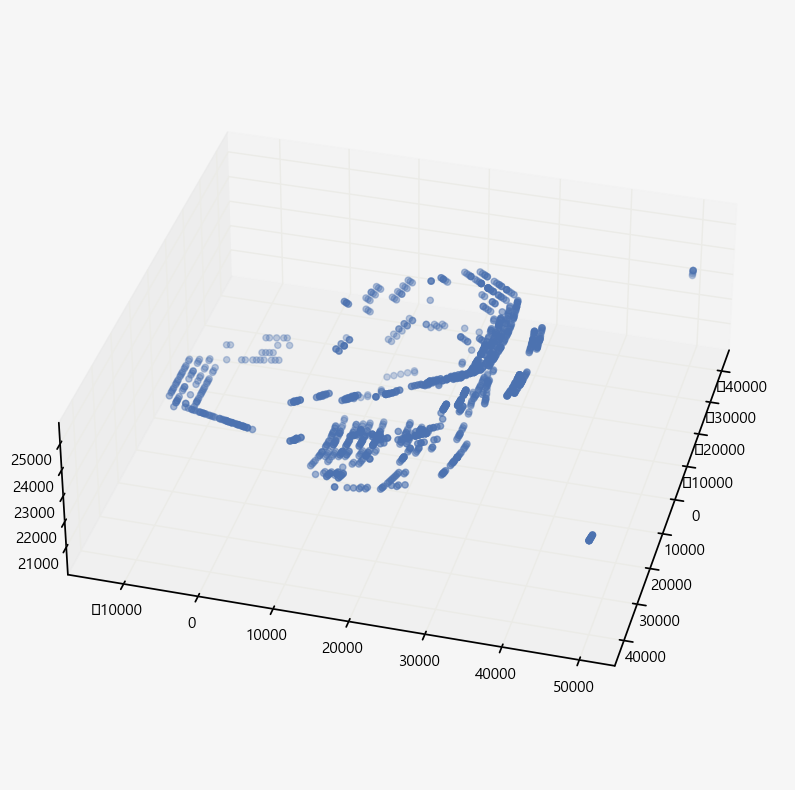

In [76]:
fig,ax = plt.subplots(figsize = (10,10),subplot_kw = {'projection' : '3d'})

ax.scatter3D(data = hh,
            xs = 'X',
            ys = 'Y',
            zs = 'Z'
)

ax.set_box_aspect([3, 3, 1])

ax.view_init(35,15)

In [89]:
hh['price']

0          10000
1520       50000
1578       50000
1610       40000
1702       47000
           ...  
1093986    10000
1094022    10000
1095331    20000
1095586    10000
1095610    10000
Name: price, Length: 1255, dtype: uint32

<AxesSubplot:xlabel='X', ylabel='Y'>

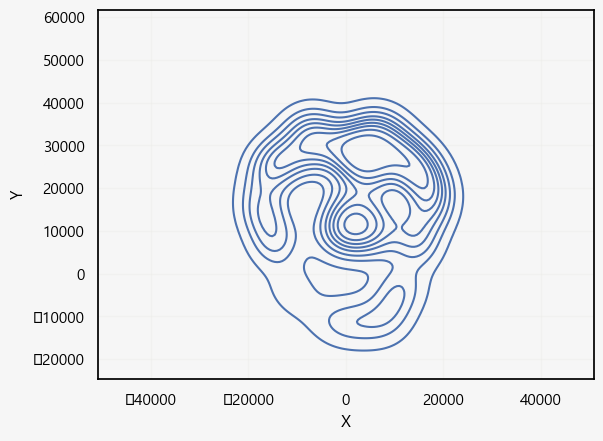

In [105]:
sns.kdeplot(
    data = hh,
    x = 'X',
    y = 'Y'
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1095610
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                1220 non-null   float64       
 1   gender             1220 non-null   category      
 2   membership_type_1  1220 non-null   category      
 3   membership_type_2  1086 non-null   category      
 4   membership_type_3  512 non-null    category      
 5   membership_type_4  159 non-null    category      
 6   membership_type_5  0 non-null      category      
 7   membership_type_6  0 non-null      float64       
 8   tran_date          1255 non-null   datetime64[ns]
 9   tran_time          1255 non-null   object        
 10  play_date          1255 non-null   datetime64[ns]
 11  play_st_time       1255 non-null   object        
 12  seat               1255 non-null   object        
 13  price              1255 non-null   uint32        
 14  ticke

NameError: name 'heatmap_data' is not defined

In [79]:
import plotly.express as px

fig = px.scatter_3d(hh, x='X', y='Y', z='Z', width=1000, height=800, 
                     title='3D Scatter Plot', size_max=5)

fig.update_scenes(aspectmode="manual", aspectratio=dict(x=3, y=3, z=1))
fig.show()

In [56]:
import plotly.express as px



fig = px.scatter_3d(test[test['Í≥µÏó∞Ïùº'] == '2022-02-04'], x='X', y='Y', z='Z', width=1000, height=1000, 
                     title='3D Scatter Plot', size_max=5)
fig.show()

ÏùºÎã®Ïó¨Í∏∞ÍπîÏ•ê

In [24]:
def time_grouping(index_col, var_col):
    
    grouped = df.groupby([index_col,var_col]).agg({'age':'count'}).reset_index()

    grouped['year'] = grouped[var_col].dt.year

    grouped['month'] = grouped[var_col].dt.month

    grouped['year_month'] = grouped['year'].astype(str) + '-' + grouped['month'].astype(str).str.zfill(2)
    grouped['year_month'] = pd.to_datetime(grouped['year_month'], format = '%Y-%m')

    year_month = grouped.groupby([index_col,'year_month']).agg({'age':'mean'}).reset_index()    
    
    return grouped,year_month

In [25]:
grouped, year_month = time_grouping('place','play_date')

Text(0.5, 0.98, 'Í≥µÏó∞Ïû• Î≥Ñ 2019 - 2023 ÌèâÍ∑† Í¥ÄÎûåÍ∞ù Ïàò')

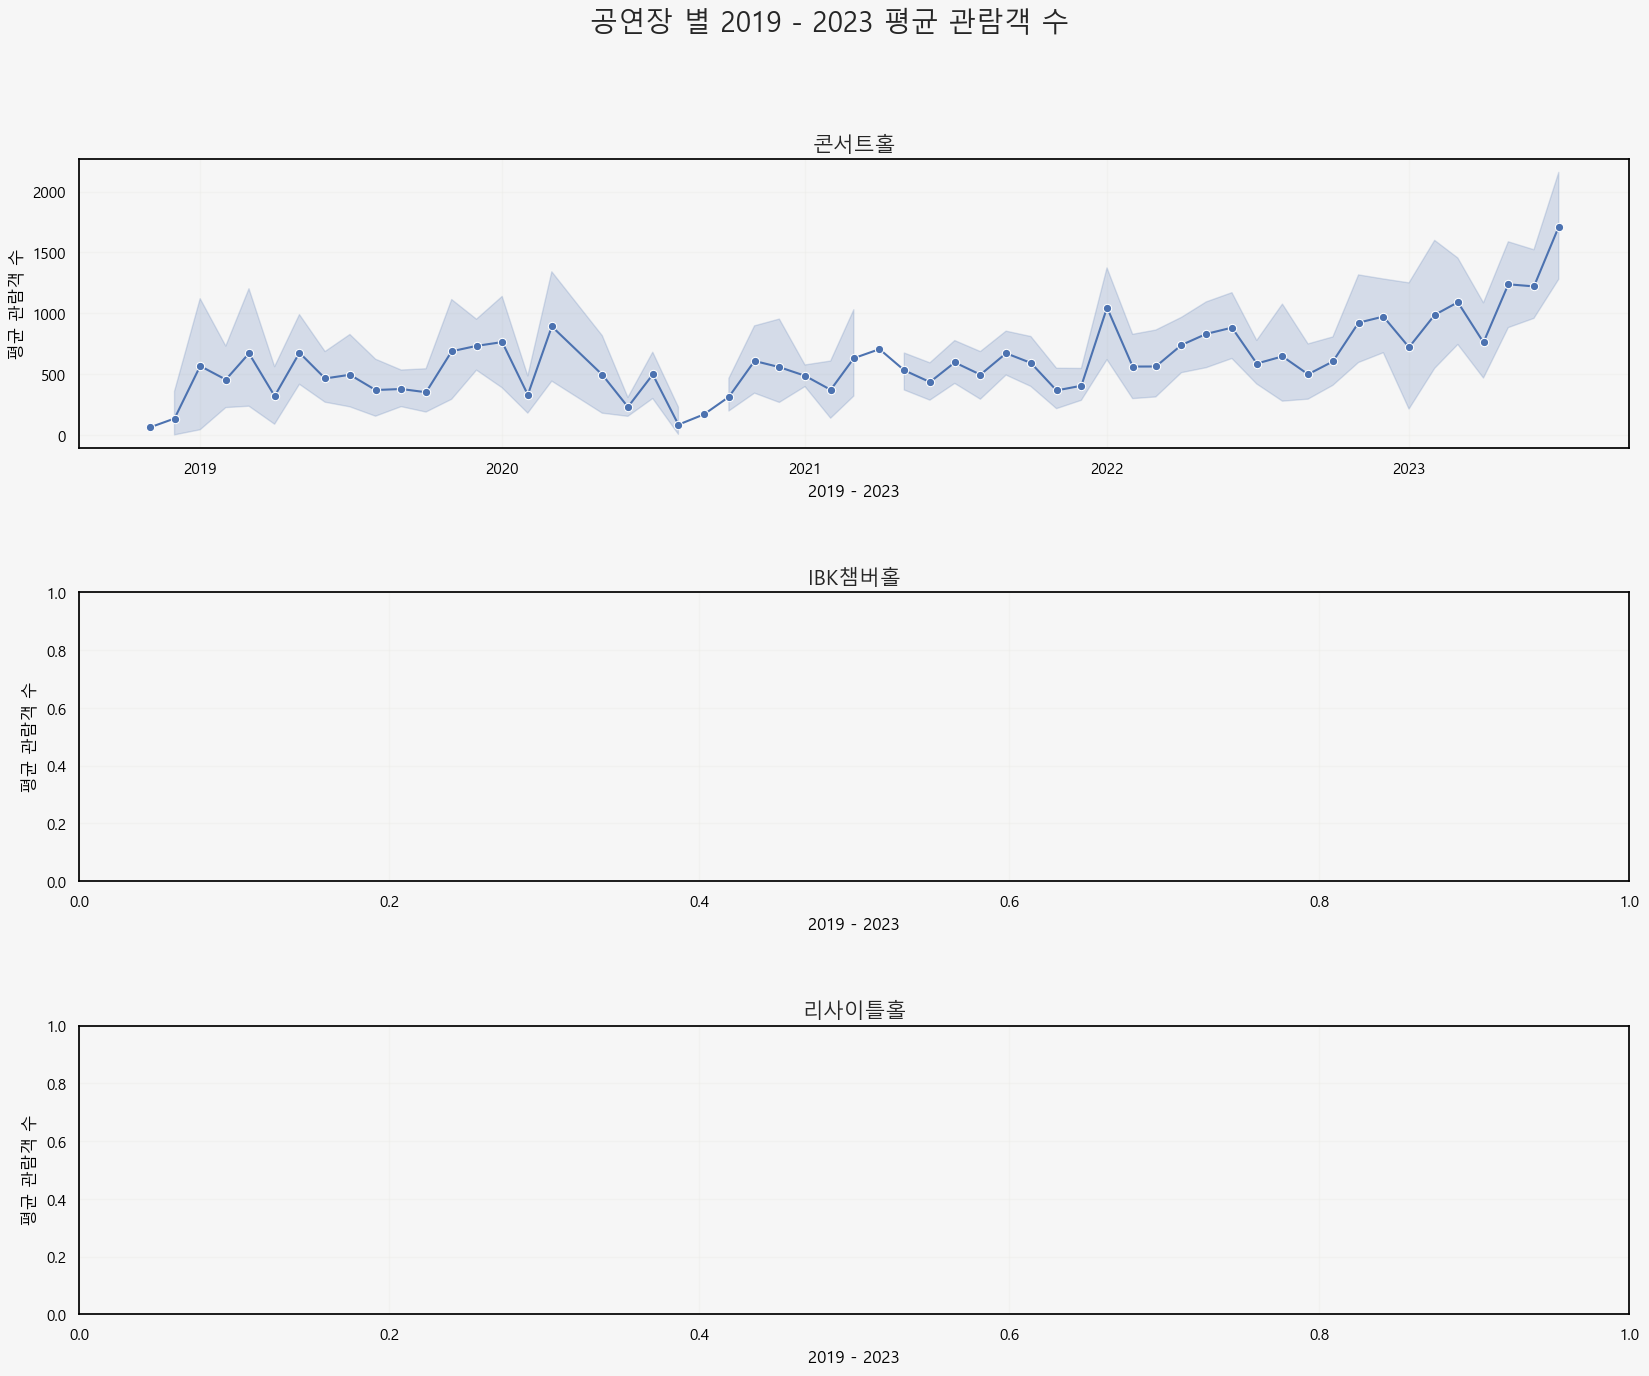

In [26]:
place = ['ÏΩòÏÑúÌä∏ÌôÄ','IBKÏ±îÎ≤ÑÌôÄ','Î¶¨ÏÇ¨Ïù¥ÌãÄÌôÄ']

fig,ax = plt.subplots(
    nrows = 3, figsize = (20,15)
)

fig.subplots_adjust(hspace = 0.5)

for i ,var in enumerate(place):
    
    cond = grouped['place'] == var
    
    sns.lineplot(
        data = grouped[cond],
        x = 'year_month',
        y = 'age',
        marker = 'o',
        ax = ax[i]
    )
    
    ax[i].set_title(var, fontsize = 15)
    ax[i].set_ylabel('ÌèâÍ∑† Í¥ÄÎûåÍ∞ù Ïàò')
    ax[i].set_xlabel('2019 - 2023')
    
fig.suptitle('Í≥µÏó∞Ïû• Î≥Ñ 2019 - 2023 ÌèâÍ∑† Í¥ÄÎûåÍ∞ù Ïàò', fontsize = 20)

<aside>
üí° Insight

 ÏΩîÎ°úÎÇòÎ°ú Ïù∏Ìï¥ Í∑úÏ†úÍ∞Ä ÏûàÎçò 2020 ~ 2022 Ï†ÑÍπåÏßÄ ÌèâÍ∑† Í¥ÄÎûåÍ∞ù ÏàòÎäî ÏΩòÏÑúÌä∏ ÌôÄÏùò Í≤ΩÏö∞ÏóêÎäî ÏΩîÎ°úÎÇò ÏãúÍ∏∞ÏôÄ Ìè¨Ïä§Ìä∏ ÏΩîÎ°úÎÇò ÏãúÍ∏∞Ïùò Ï∞®Ïù¥Í∞Ä Í∑πÎ™ÖÌïòÍ≤å ÎìúÎü¨ÎÇ©ÎãàÎã§

 IBK Ï±îÎ≤ÑÌôÄÍ≥º Î¶¨ÏÇ¨Ïù¥ÌãÄÌôÄÏùò Í≤ΩÏö∞Îäî ÏΩîÎ°úÎÇò ÏãúÍ∏∞ÏôÄ Ìè¨Ïä§Ìä∏ ÏΩîÎ°úÎÇò ÏãúÍ∏∞Ïùò Ï∞®Ïù¥Í∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÎäîÎìØÌï©ÎãàÎã§

</aside>

Text(0.5, 0.98, 'Ïû•Î•¥ Î≥Ñ 2019 - 2023 ÌèâÍ∑† Í¥ÄÎûåÍ∞ù Ïàò')

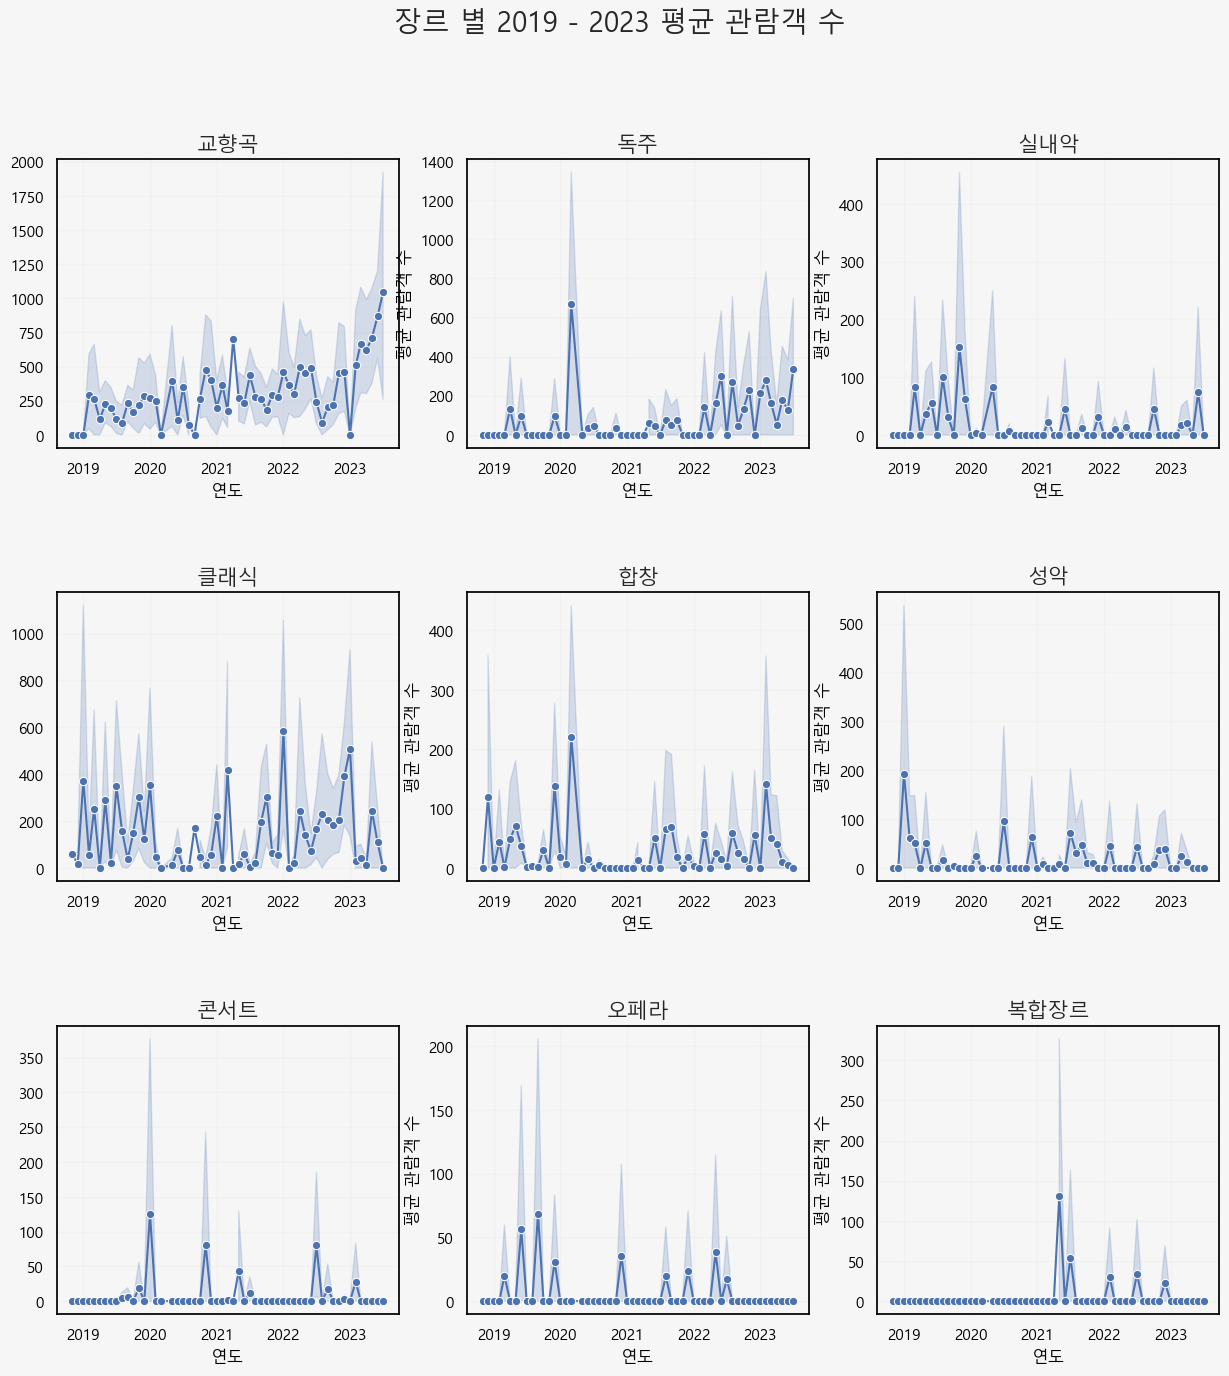

In [27]:
grouped, year_month = time_grouping('genre','play_date')

genre = ['ÍµêÌñ•Í≥°','ÎèÖÏ£º','Ïã§ÎÇ¥ÏïÖ','ÌÅ¥ÎûòÏãù','Ìï©Ï∞Ω','ÏÑ±ÏïÖ','ÏΩòÏÑúÌä∏','Ïò§ÌéòÎùº','Î≥µÌï©Ïû•Î•¥']

fig,ax = plt.subplots(
    nrows = 3,ncols = 3, figsize = (15,15)
)

ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)

for i ,var in enumerate(genre):
    
    cond = grouped['genre'] == var
    
    sns.lineplot(
        data = grouped[cond],
        x = 'year_month',
        y = 'age',
        marker = 'o',
        ax = ax[i]
    )
    ax[i].set_title(var, fontsize = 15)
    ax[i].set_xlabel('Ïó∞ÎèÑ')
    
    if i % 3:
        ax[i].set_ylabel('ÌèâÍ∑† Í¥ÄÎûåÍ∞ù Ïàò')
    else:
        ax[i].set_ylabel('')
    
fig.suptitle('Ïû•Î•¥ Î≥Ñ 2019 - 2023 ÌèâÍ∑† Í¥ÄÎûåÍ∞ù Ïàò', fontsize = 20)

<aside>
üí° Insight

 Ïû•Î•¥Î≥ÑÎ°ú ÍµêÌñ•Í≥°Í≥º ÎèÖÏ£ºÏùò Í≤ΩÏö∞Îäî ÏΩîÎ°úÎÇò ÏãúÍ∏∞ÎïåÏôÄ Ìè¨Ïä§Ìä∏ ÏΩîÎ°úÎÇò ÏãúÍ∏∞ ÎïåÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï∞®Ïù¥Í∞Ä ÎÇòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

 ÌÉÄ Ïû•Î•¥Îì§Ïùò Í≤ΩÏö∞ÏóêÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÏäµÎãàÎã§.

</aside>

# **Ï¢åÏÑùÏùÑ Ïñ¥ÎñªÍ≤å Í∑∏Î£πÌïë Ìï† Í≤ÉÏù∏Í∞ÄÏóê ÎåÄÌïú ÏïÑÏù¥ÎîîÏñ¥ Ï∂îÏ∂ú**

In [28]:
# Í≥†Î†§Ìï¥Ïïº Ìï† Ïû•ÏÜå

print(
    df['place'].unique()
)

['ÏΩòÏÑúÌä∏ÌôÄ']
Categories (1, object): ['ÏΩòÏÑúÌä∏ÌôÄ']


* ÏΩòÏÑúÌä∏ÌôÄÎì§Ïùò ÎπàÎèÑÏàò

Text(0.5, 1.0, 'ÏΩòÏÑúÌä∏ÌôÄ ÎπàÎèÑ')

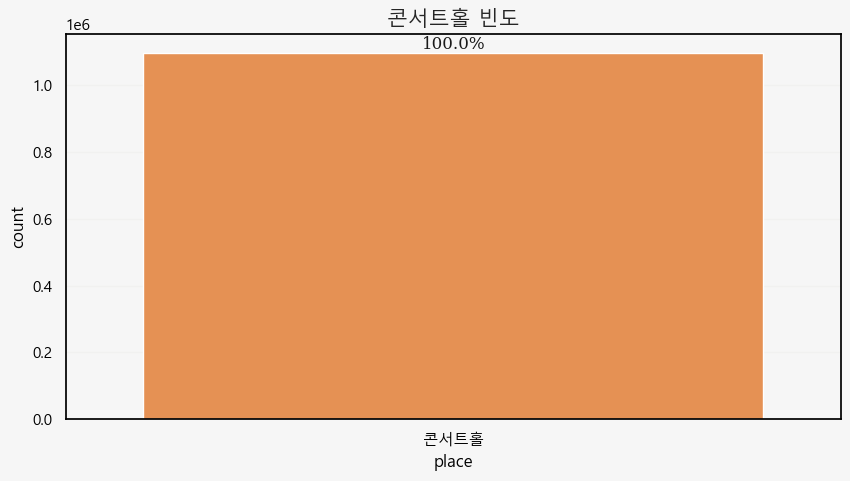

In [29]:
fig,ax = plt.subplots(figsize  = (10,5))

sns.countplot(
    data = df,
    x = 'place',
    palette = 'YlOrRd_r',
    order = df['place'].value_counts().index
)


total_bars = len(df['place'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_bars)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom', color = 'k', fontfamily = 'serif')

ax.set_title('ÏΩòÏÑúÌä∏ÌôÄ ÎπàÎèÑ', fontsize = 15)

<aside>
üí° Insight 

Ï†ÑÏ≤¥ ÏΩòÏÑúÌä∏ ÌôÄ Ï§ë 57.1 % Î°ú ÏΩòÏÑúÌä∏ÌôÄÏùò ÎπàÎèÑÍ∞Ä Í∞ÄÏû• ÎßéÏïòÏúºÎ©∞ Í∑∏ Îã§ÏùåÏúºÎ°ú IBK , Î¶¨ÏÇ¨Ïù¥ÌãÄÌôÄ ÏàúÏù¥ÏòÄÏäµÎãàÎã§ 

ÏΩòÏÑúÌä∏ÌôÄ ÎßàÎã§ ÏãúÌñâÌïòÎäî Í≥µÏó∞Ïùò Ïû•Î•¥Îäî Îã§Î•ºÍπåÏöî ?

</aside>

Text(0.5, 0.98, 'ÏΩòÏÑúÌä∏ÌôÄÏóê Îî∞Î•∏ Ïû•Î•¥ ÎπàÎèÑ')

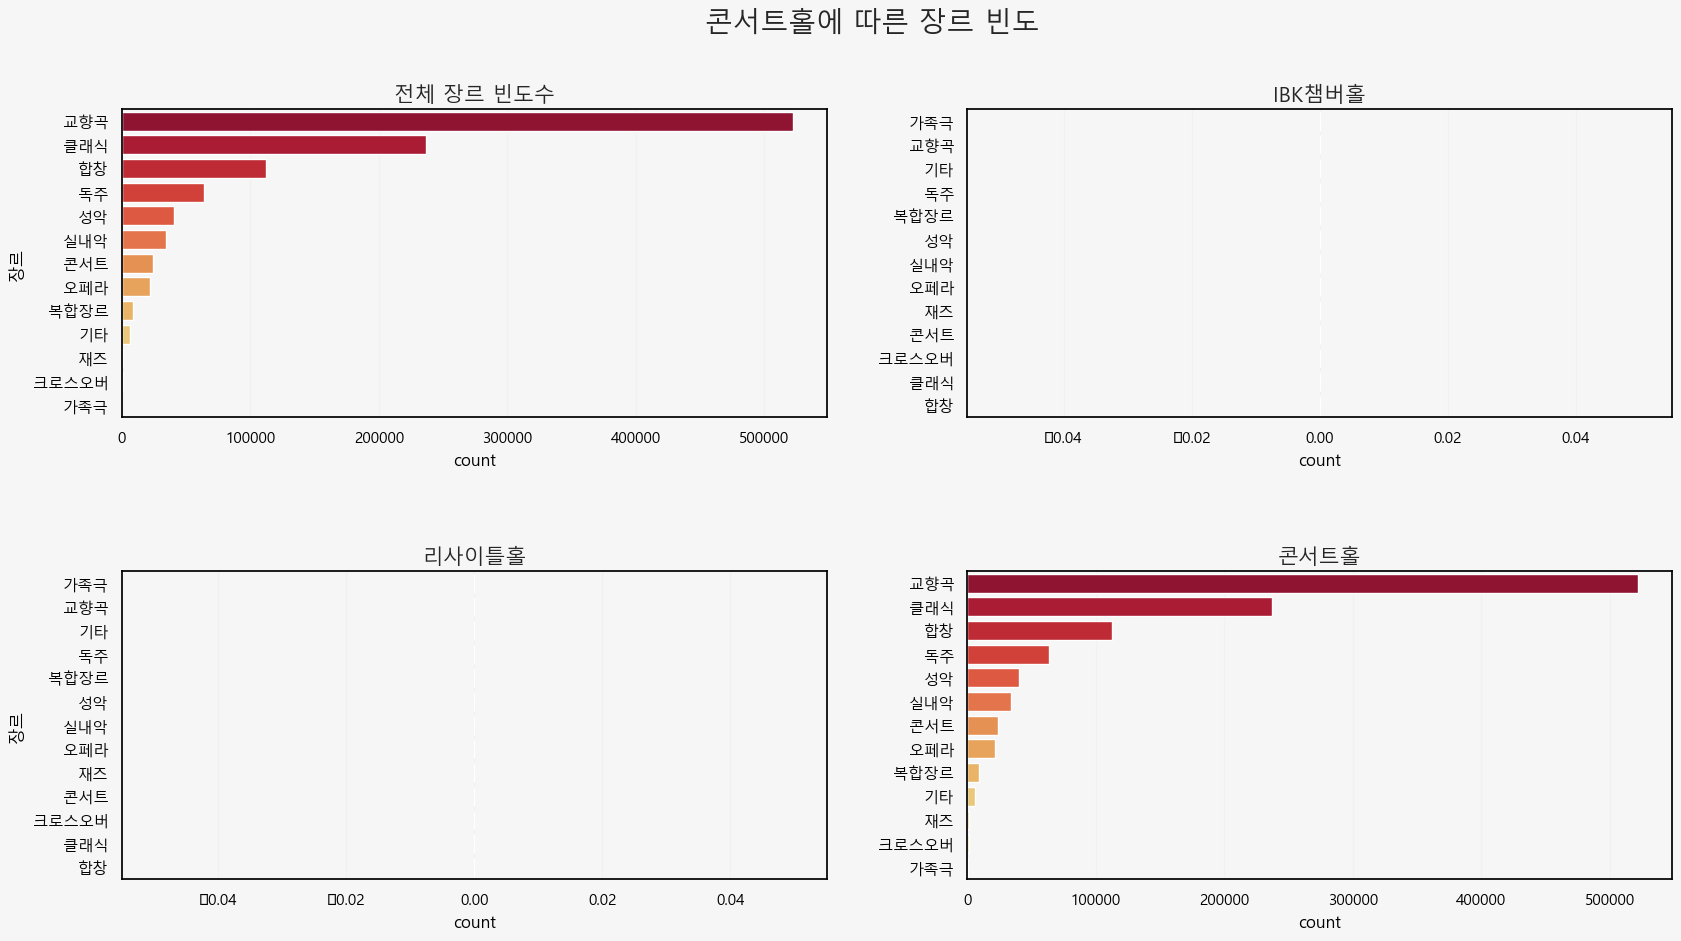

In [30]:
place = ['IBKÏ±îÎ≤ÑÌôÄ', 'Î¶¨ÏÇ¨Ïù¥ÌãÄÌôÄ','ÏΩòÏÑúÌä∏ÌôÄ']

fig,ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20,10))
ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)


total_order = df['genre'].value_counts().index

sns.countplot(
    data  = df,
    y = 'genre',
    order  = total_order,
    palette = 'YlOrRd_r',
    ax = ax[0]
)

ax[0].set_title('Ï†ÑÏ≤¥ Ïû•Î•¥ ÎπàÎèÑÏàò', fontsize = 15)

for i,var in enumerate(place):
    
    cond = df['place'] == var
    
    order = df.loc[cond, 'genre'].value_counts().index
    
    
    sns.countplot(
        data = df[cond],
        y = 'genre',
        order = order,
        palette = 'YlOrRd_r',
        ax = ax[i + 1]
    )
    


    ax[i + 1].set_title(var, fontsize = 15)
    ax[i + 1].set_ylabel('')
    
ax[0].set_ylabel('Ïû•Î•¥')
ax[2].set_ylabel('Ïû•Î•¥')
    
fig.suptitle('ÏΩòÏÑúÌä∏ÌôÄÏóê Îî∞Î•∏ Ïû•Î•¥ ÎπàÎèÑ', fontsize = 20)

In [31]:
grouped = df.groupby(['place', 'genre']).agg({'age': 'count'}).reset_index()

place_counts = grouped.groupby('place')['age'].transform('sum')

grouped['proportion'] = grouped['age'] / place_counts

top_proportions = grouped.groupby('place').apply(lambda x: x.nlargest(3, 'proportion'))

top_proportions = top_proportions.rename(columns = {'age':'count'})

top_proportions

place genre   count  proportion
place                                   
ÏΩòÏÑúÌä∏ÌôÄ  1   ÏΩòÏÑúÌä∏ÌôÄ   ÍµêÌñ•Í≥°  247426    0.522252
      11  ÏΩòÏÑúÌä∏ÌôÄ   ÌÅ¥ÎûòÏãù  107505    0.226915
      3   ÏΩòÏÑúÌä∏ÌôÄ    ÎèÖÏ£º   55036    0.116167

<aside>
üí° Insight 

Ï†ÑÏ≤¥ Ïû•Î•¥ ÎπàÎèÑÏàò Ï§ë Í∞ÄÏû• ÎßéÏïòÎçò Í≤ÉÏùÄ ÍµêÌñ•Í≥°, ÎèÖÏ£º, Ïã§ÎÇ¥ÏïÖ, ÌÅ¥ÎûòÏãù ÏàúÏù¥ÏòÄÏäµÎãàÎã§. 

IBK Ï±îÎ≤ÑÌôÄÏùÄ Ïã§ÎÇ¥ÏïÖ, ÎèÖÏ£º, ÌÅ¥ÎûòÏãù ÏàúÏúºÎ°ú ÎßéÏïòÏäµÎãàÎã§.
Î¶¨ÏÇ¨Ïù¥ÌãÄÌôÄÏùÄ ÎèÖÏ£º, Ïã§ÎÇ¥ÏïÖ, ÌÅ¥ÎûòÏãù ÏàúÏúºÎ°ú ÎßéÏïòÏäµÎãàÎã§.
ÏΩòÏÑúÌä∏ÌôÄÏùÄ ÍµêÌñ•Í≥°, ÌÅ¥ÎûòÏãù, ÎèÖÏ£º ÏàúÏúºÎ°ú ÎßéÏïòÏäµÎãàÎã§.

</aside>

# **Ï¢åÏÑù Î≥Ñ ÌèâÍ∑† ÌåêÎß§Ïú®**

<AxesSubplot:xlabel='Í≥µÏó∞Ïó∞Ïõî', ylabel='age'>

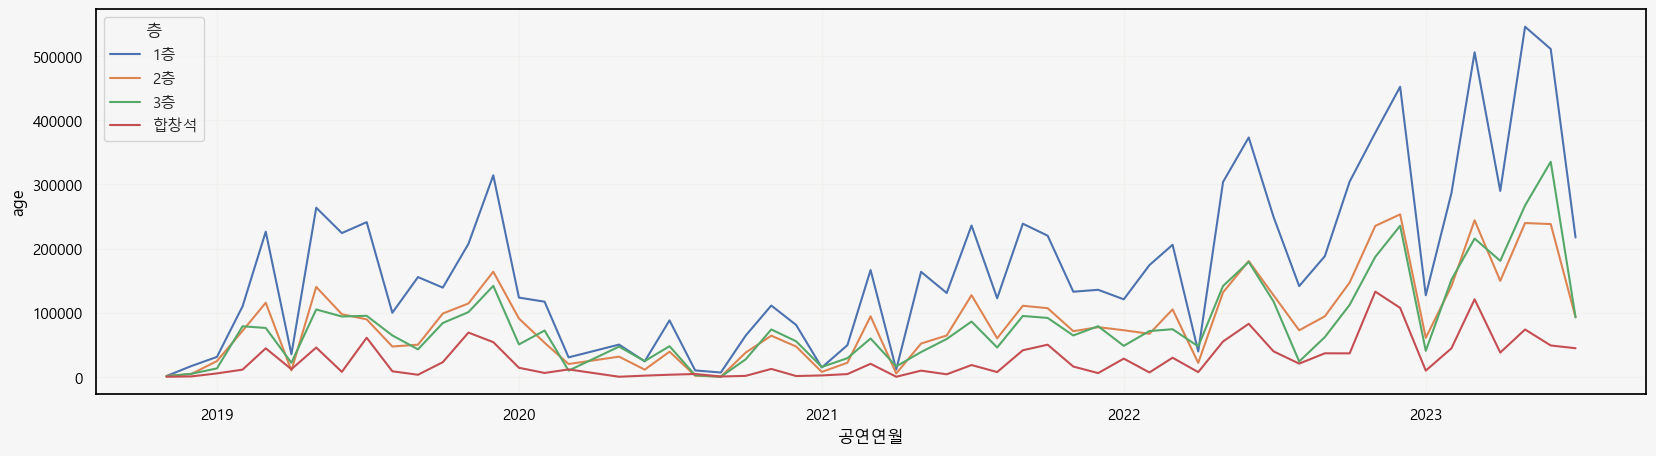

In [32]:
h = df.groupby(['Í≥µÏó∞Ïó∞Ïõî','place','Ï∏µ']).agg({'age':'sum'}).reset_index().fillna(0)

fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = h,
    x = 'Í≥µÏó∞Ïó∞Ïõî',
    y = 'age',
    hue = 'Ï∏µ',
    ci  = None
)

In [33]:
df.columns

Index(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'membership_type_6', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', 'price', 'ticket_cancel', 'discount_type',
       'performance_code', 'pre_open_date', 'open_date', 'genre', 'place',
       'running_time', 'intermission', 'member_yn', 'Í≥µÏó∞Ïó∞ÎèÑ', 'Í≥µÏó∞Ïõî', 'Í≥µÏó∞Ïùº',
       'Í≥µÏó∞Ïó∞Ïõî', 'Ï∏µ', 'ÏÑù', 'ÏÑ∏Î∂ÄÏ¢åÏÑù'],
      dtype='object')

# **Îπà Ï¢åÏÑùÎì§Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞Ä ÏãúÌÇ¨ Í≤ÉÏù∏ÏßÄÏóê ÎåÄÌïú ÏïÑÏù¥ÎîîÏñ¥**

Í≤∞Íµ≠ Í∞ôÏùÄ ÎÇ†Ïßú, Í∞ôÏùÄ Í≥µÏó∞ ÏΩîÎìú Î≥ÑÎ°ú ÏòàÎß§ ÎêòÏßÄ ÏïäÏùÄ Îπà Ï¢åÏÑùÎì§Ïùò Ï†ïÎ≥¥Î•º ÎÑ£Í≤å ÎêòÎ©¥ Í≤∞Ï∏°ÏπòÍ∞Ä ÏÉùÍ∏∏ Ïàò ÏûàÎäî Ïª¨ÎüºÍ≥º Í≤∞Ï∏°ÏπòÍ∞Ä ÏÉùÍ∏∞ÏßÄ ÏïäÎäî Ïª¨ÎüºÎì§Ïù¥ ÏûàÏùå

| Í≤∞Ï∏°ÏπòÍ∞Ä ÏÉùÍ∏∏ Ïª¨Îüº       | Í≤∞Ï∏°ÏπòÍ∞Ä ÏÉùÍ∏∞ÏßÄ ÏïäÏùÑ Ïª¨Îüº      | 
|-------------|-----------|
| age,gender,membership_type,tran_date, tran_time     | play_date, play_st_time,seat   |
| price,member_yn     |open_date,genre,place,running_time,intermission,Í≥µÏó∞Ïó∞ÎèÑ, Í≥µÏó∞Ïõî, Í≥µÏó∞Ïùº, Í≥µÏó∞Ïó∞Ïõî, Ï∏µ, ÏÑù , ÏÑ∏Î∂ÄÏ¢åÏÑù    |


# **ÌîÑÎ°úÌÜ† ÌÉÄÏûÖ ÎßåÎì§Í∏∞**